In [1]:
##loading names
import torch

words = open('names.txt', 'r').read().splitlines()
itos={i+1:ch for i,ch in enumerate(list(sorted(set(''.join(words)))))}
itos[0]='.'
stoi={ch:i for i,ch in itos.items()}
# stoi

In [2]:
import torch

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [3]:
N=torch.zeros((27,27), dtype=torch.int32)
for word in words:
    tmp_word= '.' + word + '.'
    for ch, ch1 in zip(tmp_word, tmp_word[1:]):
        N[stoi[ch], stoi[ch1]]+=1
        # print(ch, ch1)
        # print(stoi[ch], stoi[ch1])


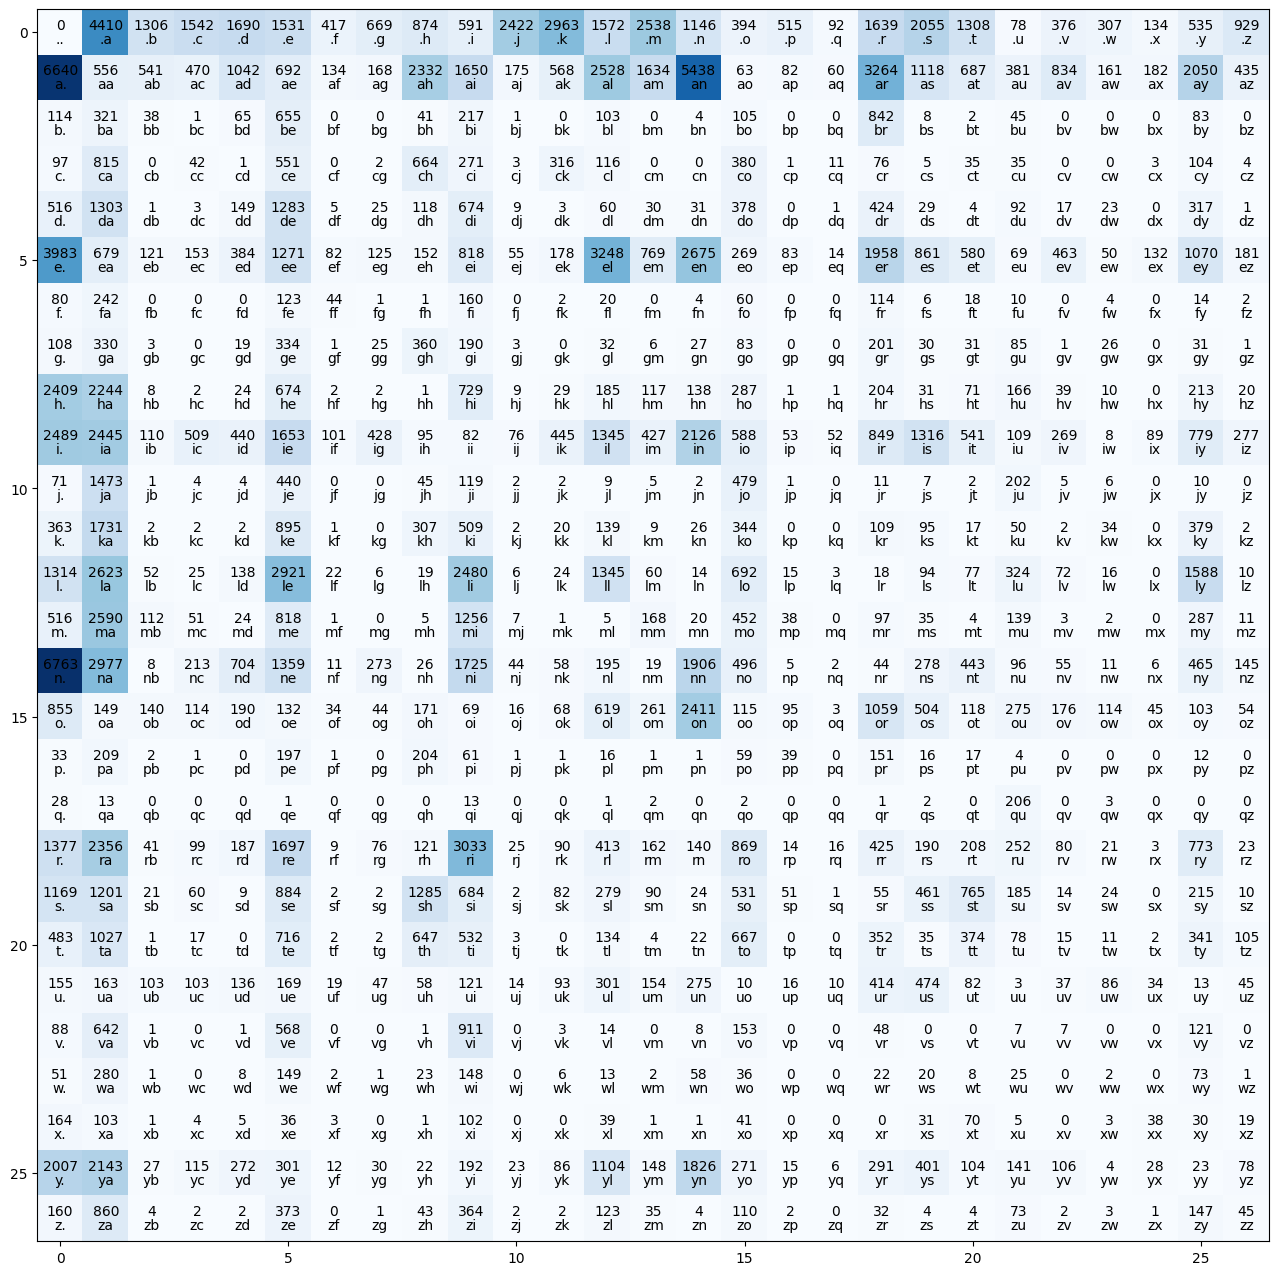

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        plt.text(j,i, itos[i]+itos[j], ha='center', va='top')
        plt.text(j,i, N[i,j].item(), ha='center', va='bottom')


In [5]:
g=torch.Generator().manual_seed(2147483647)
P = (N+1).float()
P /= P.sum(1, keepdim=True)
ix = 0
out = []
while True:
    p = P[ix]
    random_index = torch.multinomial(p, 1, replacement=True, generator=g).item()
    out.append(itos[random_index])
    if random_index==0:
        break
    ix = random_index
print("".join(out))

junide.


In [6]:
g = torch.Generator().manual_seed(2147483647)
P = (N+1).float()
P /= P.sum(1, keepdim=True)


for i in range(5):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.


In [7]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([25, 14, 20, 18, 25, 13,  8, 19,  0, 13, 18, 10, 14, 18,  0,  9, 18,  0,
         8,  0,  0, 14, 13, 14, 25, 12, 18, 26,  0, 18, 14,  9,  0, 18,  0,  2,
        18,  9, 14,  4,  9,  0,  4,  8,  4, 19, 12,  1,  9,  4, 12, 14, 16, 14,
        12, 20, 13,  8, 14,  5,  8,  8, 25, 21, 12, 18,  0,  8,  0,  0, 22,  0,
         0,  0, 10, 12, 25, 18,  0,  9, 13,  9, 14,  2, 14, 19,  9, 18, 14,  4,
         5, 14, 14,  9, 14,  0,  0,  4,  0,  8])

In [8]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [9]:
import torch

words = open('names.txt', 'r').read().splitlines()
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

N=torch.zeros((27,27), dtype=torch.int32)
for word in words:
    tmp_word= '.' + word + '.'
    for ch, ch1 in zip(tmp_word, tmp_word[1:]):
        N[stoi[ch], stoi[ch1]]+=1
        
g = torch.Generator().manual_seed(2147483647)
P = (N+1).float()
P /= P.sum(1, keepdim=True)


for i in range(5):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.


In [10]:
log_likelihood = 0.0
n = 0

# for w in words:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [11]:
xs, ys= [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(f'{ch1}{ch2}: {ix1} {ix2}')
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)


.e: 0 5
em: 5 13
mm: 13 13
ma: 13 1
a.: 1 0


In [12]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc.shape

torch.Size([5, 27])

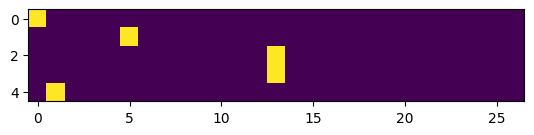

In [13]:
plt.imshow(xenc)

In [14]:
W = torch.randn((27, 27), requires_grad=True, generator=g)
xenc @ W

tensor([[-2.1921e+00, -7.8142e-01, -2.8077e-01, -7.3891e-01,  1.7249e+00,
          3.7955e-02, -1.0694e+00, -5.3744e-01,  2.2497e+00, -4.7550e-01,
          6.2050e-01,  1.1500e+00, -9.6432e-01, -8.8152e-01, -8.2953e-01,
         -2.5477e-01,  1.5204e+00,  8.7856e-01, -7.1588e-01, -1.0549e+00,
          8.3720e-01, -4.9714e-01, -9.3980e-01,  1.3429e-01,  7.2775e-01,
         -2.5268e+00,  1.0736e+00],
        [ 1.4722e+00, -1.0877e+00, -1.8156e-02, -2.8800e-01,  8.7248e-01,
         -5.5840e-02,  5.0983e-01,  1.7807e+00,  1.4590e+00, -8.2984e-01,
          2.1452e+00,  3.3263e-01, -2.6167e-01, -2.1089e-01, -7.5038e-01,
         -2.2396e+00, -7.1251e-01,  8.6907e-01,  7.7798e-02, -4.6144e-01,
          6.0982e-01, -2.5358e-01, -6.3923e-01, -7.3396e-01,  2.0002e+00,
         -1.1567e+00,  1.9772e-01],
        [-1.0848e-01, -4.7348e-01, -2.3107e-01,  1.7249e-01,  1.9007e-03,
         -9.5376e-02, -9.2531e-01, -6.7905e-01, -1.6331e+00,  8.7924e-01,
          2.1157e+00, -9.1996e-01,  1.37

In [15]:
W = torch.randn((27, 27), requires_grad=True, generator=g)
logits=(xenc @ W)
counts=logits.exp()
prob = counts / counts.sum(1,keepdim=True)
prob[1,:]

tensor([0.0214, 0.0380, 0.0204, 0.0142, 0.0386, 0.0029, 0.0811, 0.0206, 0.0090,
        0.0836, 0.0844, 0.0264, 0.1915, 0.0166, 0.0253, 0.0229, 0.0172, 0.0374,
        0.0111, 0.0405, 0.0350, 0.0081, 0.0042, 0.0648, 0.0094, 0.0550, 0.0203],
       grad_fn=<SliceBackward0>)

In [16]:
(xenc[3] * W[:,13]).sum()

tensor(-0.4533, grad_fn=<SumBackward0>)

In [17]:
(xenc @ W)[3,13]

tensor(-0.4533, grad_fn=<SelectBackward0>)

In [18]:
# dataset for emma

xs, ys= [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(f'{ch1}{ch2}: {ix1} {ix2}')
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)
xenc = F.one_hot(xs, num_classes=27).float()
W = torch.randn((27, 27), requires_grad=True, generator=g)

.e: 0 5
em: 5 13
mm: 13 13
ma: 13 1
a.: 1 0


In [19]:
# forward pass
logits=(xenc @ W)
counts=logits.exp()
prob = counts / counts.sum(1,keepdim=True)
loss=-prob[torch.arange(len(xs)),ys].log().mean()
loss

tensor(3.5939, grad_fn=<NegBackward0>)

In [20]:
# backward pass
W.grad = None
loss.backward()

W.data += -0.1 * W.grad

In [21]:
for i in range(10):
  logits=(xenc @ W)
  counts=logits.exp()
  prob = counts / counts.sum(1,keepdim=True)
  loss=-prob[torch.arange(len(xs)),ys].log().mean()
  W.grad = None
  loss.backward()
  W.data += -0.1 * W.grad
  print(loss)

tensor(3.5750, grad_fn=<NegBackward0>)
tensor(3.5562, grad_fn=<NegBackward0>)
tensor(3.5374, grad_fn=<NegBackward0>)
tensor(3.5187, grad_fn=<NegBackward0>)
tensor(3.5000, grad_fn=<NegBackward0>)
tensor(3.4814, grad_fn=<NegBackward0>)
tensor(3.4628, grad_fn=<NegBackward0>)
tensor(3.4443, grad_fn=<NegBackward0>)
tensor(3.4258, grad_fn=<NegBackward0>)
tensor(3.4074, grad_fn=<NegBackward0>)


In [33]:
xs, ys= [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)
xenc = F.one_hot(xs, num_classes=27).float()
W = torch.randn((27, 27), requires_grad=True, generator=g)

In [39]:
# training a simple model

for i in range(100):
  logits=(xenc @ W)
  counts=logits.exp()
  prob = counts / counts.sum(1,keepdim=True)
  loss=-prob[torch.arange(len(xs)),ys].log().mean() + 0.01*(W**2).mean()
  W.grad = None
  loss.backward()
  W.data += -50 * W.grad
  print(loss)

tensor(2.4808, grad_fn=<AddBackward0>)
tensor(2.4808, grad_fn=<AddBackward0>)


tensor(2.4808, grad_fn=<AddBackward0>)
tensor(2.4808, grad_fn=<AddBackward0>)
tensor(2.4808, grad_fn=<AddBackward0>)
tensor(2.4808, grad_fn=<AddBackward0>)
tensor(2.4808, grad_fn=<AddBackward0>)
tensor(2.4808, grad_fn=<AddBackward0>)
tensor(2.4808, grad_fn=<AddBackward0>)
tensor(2.4808, grad_fn=<AddBackward0>)
tensor(2.4808, grad_fn=<AddBackward0>)
tensor(2.4808, grad_fn=<AddBackward0>)
tensor(2.4808, grad_fn=<AddBackward0>)
tensor(2.4808, grad_fn=<AddBackward0>)
tensor(2.4808, grad_fn=<AddBackward0>)
tensor(2.4808, grad_fn=<AddBackward0>)
tensor(2.4808, grad_fn=<AddBackward0>)
tensor(2.4808, grad_fn=<AddBackward0>)
tensor(2.4808, grad_fn=<AddBackward0>)
tensor(2.4808, grad_fn=<AddBackward0>)
tensor(2.4808, grad_fn=<AddBackward0>)
tensor(2.4808, grad_fn=<AddBackward0>)
tensor(2.4808, grad_fn=<AddBackward0>)
tensor(2.4808, grad_fn=<AddBackward0>)
tensor(2.4808, grad_fn=<AddBackward0>)
tensor(2.4808, grad_fn=<AddBackward0>)
tensor(2.4808, grad_fn=<AddBackward0>)
tensor(2.4808, grad_fn=<A

In [44]:
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
  
  out = []
  ix = 0
  while True:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits=(xenc @ W)
    counts=logits.exp()
    p = counts / counts.sum(1,keepdim=True)
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cfay.
a.


In [ ]:
junide.
janasah.
p.
cony.
a.

why do we use cross entropy loss?

dl divergence can be used to compare two probability distribution. 
so when we have probability distribution of Correct GT and distribution of model output. we would like both of them to match.
the above process when simplified will lead to cross entropy loss and the weights of the model only affect the probability distribution of model and nothing to do with distribution of GT.

ai comments:

* The core motivation is to make the model’s predicted probability distribution match the true (ground-truth) distribution as closely as possible.
* KL divergence is a well-founded method for measuring how one probability distribution differs from another.
* Minimizing KL divergence between the model’s distribution and the ground-truth distribution yields the cross-entropy loss (plus a separate term that does not depend on the model).
* Consequently, optimizing the cross-entropy loss has become standard in classification because it is effectively equivalent to minimizing the KL divergence.
* Indeed, the weights of the model affect only the model’s predicted distribution; the ground-truth distribution is fixed.

binary cross-entropy uses sigmoid where as multiclass cross entropy uses softmax
when we take the gradients of the above it automatically pushes negative classes down and positive classes up
[How does cross entropy push negative classes down and positive classes up even though we only use positive class in loss function](backpropogation_in_cross_entropy_for_negative_pos_labels.pdf)
